xgboost

In [12]:
pip install xgboost==2.1.1


[notice] A new release of pip is available: 23.3 -> 25.0.1
[notice] To update, run: pip3.12 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install setuptools


[notice] A new release of pip is available: 23.3 -> 25.0.1
[notice] To update, run: pip3.12 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [16]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [15]:
xgb.__version__

'1.5.0'

데이터프레임 생성
- x : 학습 데이터 (피처)
- y : 타겟 데이터 (정답)

In [21]:
dataset = load_breast_cancer()
x = dataset.data
y = dataset.target
cancer_df = pd.DataFrame(data = x, columns = dataset.feature_names)
cancer_df['target']=y
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


데이터 분할

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 156)
x_train.shape, x_test.shape

((455, 30), (114, 30))

데이터 타입 변환

In [24]:
dtrain = xgb.DMatrix(x_train,y_train)
dtest = xgb.DMatrix(x_test,y_test)

In [25]:
x_tr,x_val,y_tr,y_val = train_test_split(x_train,y_train,test_size = 0.1, random_state = 156)

In [27]:
dtr = xgb.DMatrix(x_tr,y_tr)
dval = xgb.DMatrix(x_val, y_val)
dtest = xgb.DMatrix(x_test,y_test)

In [29]:
params = {
    'max_depth' :3,
    'eta' : 0.05,
    'objective' : 'binary:logistic',
    'eval_metric' : 'logloss'
}
num_rounds = 400 

In [30]:
eval_list = [(dtr,'train'),(dval,'eval')] # 학습할 때 필요한 목록 생성
xgb_model = xgb.train(params, dtr, num_boost_round=num_rounds,early_stopping_rounds=50,evals=eval_list)

[0]	train-logloss:0.65016	eval-logloss:0.66183
[1]	train-logloss:0.61131	eval-logloss:0.63609
[2]	train-logloss:0.57563	eval-logloss:0.61144
[3]	train-logloss:0.54310	eval-logloss:0.59204
[4]	train-logloss:0.51323	eval-logloss:0.57329
[5]	train-logloss:0.48447	eval-logloss:0.55037
[6]	train-logloss:0.45796	eval-logloss:0.52929
[7]	train-logloss:0.43436	eval-logloss:0.51534
[8]	train-logloss:0.41150	eval-logloss:0.49718
[9]	train-logloss:0.39027	eval-logloss:0.48154
[10]	train-logloss:0.37128	eval-logloss:0.46990
[11]	train-logloss:0.35254	eval-logloss:0.45474
[12]	train-logloss:0.33528	eval-logloss:0.44229
[13]	train-logloss:0.31893	eval-logloss:0.42961
[14]	train-logloss:0.30439	eval-logloss:0.42065
[15]	train-logloss:0.29000	eval-logloss:0.40958
[16]	train-logloss:0.27651	eval-logloss:0.39887
[17]	train-logloss:0.26389	eval-logloss:0.39050
[18]	train-logloss:0.25210	eval-logloss:0.38254
[19]	train-logloss:0.24123	eval-logloss:0.37393
[20]	train-logloss:0.23076	eval-logloss:0.36789
[2

In [32]:
pred_probs = xgb_model.predict(dtest)

In [33]:
pred_probs

array([0.8447872 , 0.00842587, 0.6796298 , 0.08113331, 0.9751338 ,
       0.9988939 , 0.9983084 , 0.9980654 , 0.99637896, 0.00138468,
       0.00252283, 0.00154995, 0.99780875, 0.99829525, 0.99691856,
       0.9965521 , 0.99120796, 0.9982718 , 0.9970682 , 0.9978916 ,
       0.00202923, 0.10774372, 0.00137198, 0.9989255 , 0.00107862,
       0.7800014 , 0.00295459, 0.00154995, 0.9966723 , 0.05379276,
       0.958738  , 0.00149019, 0.9700533 , 0.8656249 , 0.00678389,
       0.00140975, 0.97810876, 0.99713576, 0.24059245, 0.9972307 ,
       0.35760084, 0.99708337, 0.9919429 , 0.99659145, 0.9962838 ,
       0.9179466 , 0.036952  , 0.997417  , 0.99325067, 0.99804085,
       0.99648905, 0.00236221, 0.9979361 , 0.99784875, 0.9960328 ,
       0.99391055, 0.9984106 , 0.99635327, 0.9967404 , 0.896291  ,
       0.9967794 , 0.9520696 , 0.00349248, 0.00202715, 0.9980167 ,
       0.98225844, 0.00349248, 0.99056447, 0.9972249 , 0.9978916 ,
       0.00297725, 0.99731344, 0.00163038, 0.98887384, 0.99624

In [34]:
np.round(pred_probs,3)

array([0.845, 0.008, 0.68 , 0.081, 0.975, 0.999, 0.998, 0.998, 0.996,
       0.001, 0.003, 0.002, 0.998, 0.998, 0.997, 0.997, 0.991, 0.998,
       0.997, 0.998, 0.002, 0.108, 0.001, 0.999, 0.001, 0.78 , 0.003,
       0.002, 0.997, 0.054, 0.959, 0.001, 0.97 , 0.866, 0.007, 0.001,
       0.978, 0.997, 0.241, 0.997, 0.358, 0.997, 0.992, 0.997, 0.996,
       0.918, 0.037, 0.997, 0.993, 0.998, 0.996, 0.002, 0.998, 0.998,
       0.996, 0.994, 0.998, 0.996, 0.997, 0.896, 0.997, 0.952, 0.003,
       0.002, 0.998, 0.982, 0.003, 0.991, 0.997, 0.998, 0.003, 0.997,
       0.002, 0.989, 0.996, 0.001, 0.999, 0.999, 0.999, 0.001, 0.001,
       0.938, 0.997, 0.997, 0.993, 0.991, 0.991, 0.993, 0.983, 0.001,
       0.194, 0.998, 0.007, 0.006, 0.998, 0.008, 0.03 , 0.995, 0.002,
       0.788, 0.006, 0.003, 0.996, 0.996, 0.604, 0.997, 0.997, 0.858,
       0.997, 0.999, 0.603, 0.98 , 0.996, 0.998], dtype=float32)

In [35]:
pred = [ 1 if x > 0.5 else 0 for x in pred_probs]
pred

[1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [36]:
def get_clf_eval(y_test,pred=None,pred_proba =None):
    from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test,pred_proba)
    print('오차행렬')
    print(confusion)
    print(f'정확도:{accuracy:.4f},정밀도:{precision:.4f},재현율:{recall:.4f},F1:{f1:.4f},AUC:{roc_auc:.4f}')

In [39]:
get_clf_eval(y_test,pred,pred_probs)

오차행렬
[[34  3]
 [ 2 75]]
정확도:0.9561,정밀도:0.9615,재현율:0.9740,F1:0.9677,AUC:0.9937


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

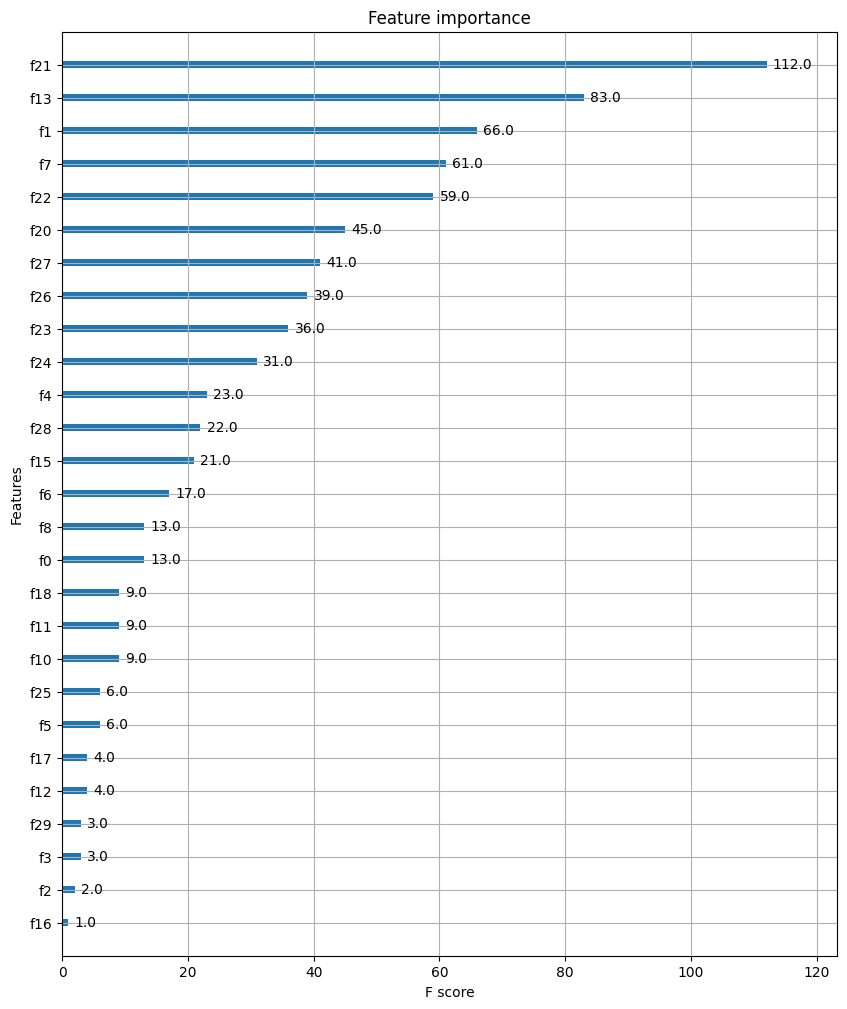

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_model,ax=ax)

lightgbm

In [43]:
pip install lightgbm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 3.2 MB/s eta 0:00:00a 0:00:010m

[notice] A new release of pip is available: 23.3 -> 25.0.1
[notice] To update, run: pip3.12 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [44]:
import lightgbm
from lightgbm import LGBMClassifier

In [47]:
lightgbm.__version__

'4.6.0'

In [49]:
lgbm_wrapper = LGBMClassifier(n_estimators=400,learning_rate=0.05)
evals = [(x_tr,y_tr),(x_val,y_val)]

In [53]:
lgbm_wrapper.fit(x_tr,y_tr,early_stopping_rounds=50,
                 eval_metric='logloss',eval_set=evals
                )

TypeError: LGBMClassifier.fit() got an unexpected keyword argument 'early_stopping_rounds'

### 데이터 분석 흐름 요약

1. **데이터 파악**  
   - 각 피처(변수) 값들 간 연관관계 확인  
   - 만약 피처들이 결과값과 전혀 연관이 없다면, 모델 성능에도 영향 없음  

2. **피처 선택 (Feature Selection)**  
   - 결과값(Y)과의 연관관계를 근거로 중요 피처 선택  
   - 통계적 분석(상관계수, p-value 등) 또는 모델 기반 중요도 활용  

3. **데이터 전처리**  
   - 결측치 처리, 이상치 제거, 스케일링, 인코딩 등  

4. **결과값 처리**  
   - 회귀: 연속형 변수 확인  
   - 분류: 클래스 불균형 처리(SMOTE 등), 레이블 인코딩 등  
